Librerias y funciones

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

plt.ioff()  # Desactiva el modo interactivo de matplotlib

# RUNGE KUTTA 4° ORDER
def runge_kutta(f1_original, f2_original, y0, h, n):
    """
    Implementación del método de Runge-Kutta de cuarto orden para sistemas de ecuaciones diferenciales.
    
    Parámetros:
    - func: función que calcula las derivadas del sistema
    - y0: condiciones iniciales (array de numpy)
    - h: tamaño del paso
    - n: número de pasos
    
    Retorna:
    - y: matriz con la solución del sistema
    """
    y = np.zeros((len(y0), n+1))
    y[:,0] = y0
    
    for k in range(n):
        k1 = f(y[:,k], f1_original, f2_original)
        k2 = f(y[:,k] + (h/2)*k1, f1_original, f2_original)
        k3 = f(y[:,k] + (h/2)*k2, f1_original, f2_original)
        k4 = f(y[:,k] + h*k3, f1_original, f2_original)
        y[:,k+1] = y[:,k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return y

# JACOBIANO
def calcular_jacobiano(f1, f2, vars):
    """
    Calcula la matriz Jacobiana para un sistema 2x2
    
    Parámetros:
    f1, f2: Funciones del sistema (sympy expressions)
    vars: Lista de variables [x, y]
    
    Retorna:
    Matriz Jacobiana 2x2 (sympy Matrix)
    """
    # Calcular derivadas parciales
    df1x = sp.diff(f1, vars[0])
    df1y = sp.diff(f1, vars[1])
    df2x = sp.diff(f2, vars[0])
    df2y = sp.diff(f2, vars[1])
    
    return sp.Matrix([[df1x, df1y], 
                     [df2x, df2y]])

# SISTEMA DE ECUACIONES
def f(z,f1_original,f2_original):
    """
    Función que calcula las derivadas del sistema
    Parámetros:
    - z = array de numpy con las variables (x,y)
    - f1_original = expresión que representa la derivada respecto a x
    - f2_original = expresión que representa la derivada respecto a y

    Retorna:
    - derivadas = array de numpy con las derivadas
    """
    x, y =z
    dx = eval(f1_original)
    dy = eval(f2_original)
    return np.array([dx,dy])

Obtener el sistema de ecuaciones diferenciales

In [19]:
"""
Obtener la expresión de la ecuación diferencial

Se pide al usuario ingresar la expresión de la ecuación diferencial.

Se pide al usuario si se desea incluir la perturbación o no. Si se desea incluir la perturbación, se pide al usuario ingresar la expresión de la perturbación.
"""
f1_original = input("dx/dt = ")
f2_original = input("dy/dt = ")
nombre = input("Ingresar el nombre del sistema = ")
print(f"El sistema {nombre} se expresa como:")
print(f"dx/dt = {f1_original}")
print(f"dy/dt = {f2_original}")

El sistema Prueba se expresa como:
dx/dt = -y+x*(1-x**2-y**2)
dy/dt = x+y*(1-x**2-y**2)


Linealización

In [20]:
# Definir variables simbólicas
x, y = sp.symbols('x y')
    
# Definir un sistema de ejemplo (puedes modificarlo)
# Sistema tipo Van der Pol modificado (relevante para ciclos límite)
mu = sp.symbols('mu')  # Parámetro de bifurcación
f1 = eval(f1_original)
f2 = eval(f2_original)
    
# Calcular Jacobiano
J = calcular_jacobiano(f1, f2, [x, y])

print("Matriz Jacobiana del sistema:")
sp.pprint(J)
    
# Evaluar en un punto de equilibrio (ejemplo en (0,0))
J_eq = J.subs({x:0, y:0})
print("\nJacobiano evaluado en (0,0):")
sp.pprint(J_eq)
    
# Calcular valores propios (para análisis de estabilidad)
eigenvals = J_eq.eigenvals()
print("\nValores propios en (0,0):")
sp.pprint(eigenvals)

# Sistema linealizado
f1_original_lineal=str(np.array(J_eq)[0][0]*x+np.array(J_eq)[0][1]*y)
f2_original_lineal=str(np.array(J_eq)[1][0]*x+np.array(J_eq)[1][1]*y)
print("\nSistema linealizado:")
print(f"dx/dt = {f1_original_lineal}")
print(f"dy/dt = {f2_original_lineal}")

Matriz Jacobiana del sistema:
⎡     2    2                     ⎤
⎢- 3⋅x  - y  + 1    -2⋅x⋅y - 1   ⎥
⎢                                ⎥
⎢                    2      2    ⎥
⎣  -2⋅x⋅y + 1     - x  - 3⋅y  + 1⎦

Jacobiano evaluado en (0,0):
⎡1  -1⎤
⎢     ⎥
⎣1  1 ⎦

Valores propios en (0,0):
{1 - ⅈ: 1, 1 + ⅈ: 1}

Sistema linealizado:
dx/dt = x - y
dy/dt = x + y


Graficar

/tmp/ipykernel_3253/2609792202.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


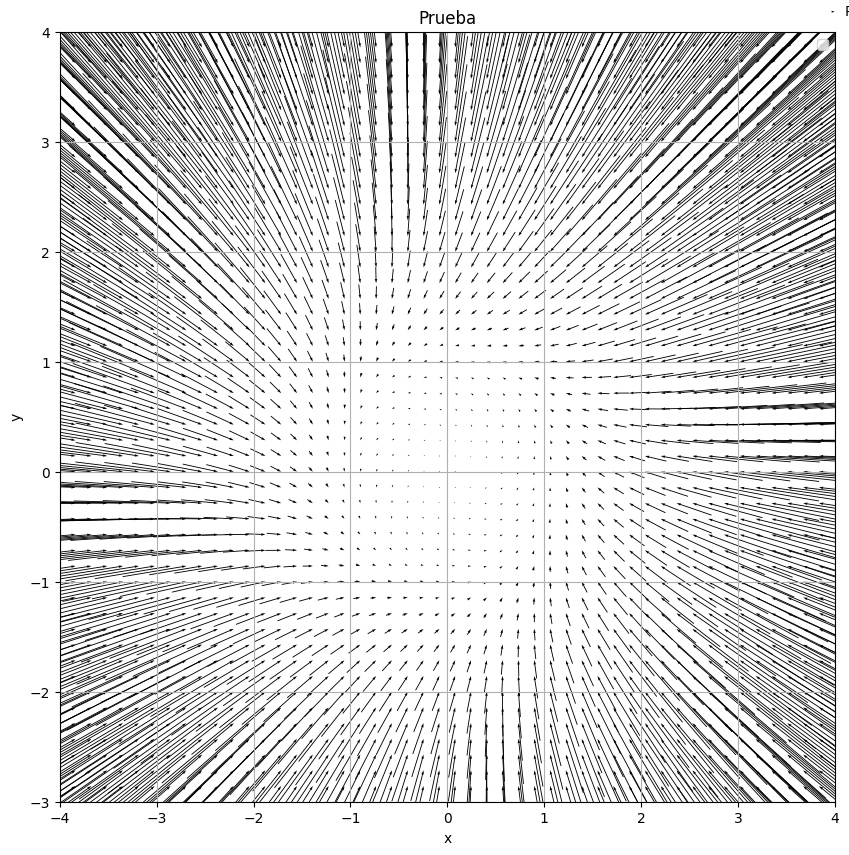

In [ ]:
# Crea una cuadrícula de valores x e y
# Límites
Lx_inf = float(input("Límite inferior de x: "))
Lx_sup = float(input("Límite superior de x: "))
Ly_inf = float(input("Límite inferior de y: "))
Ly_sup = float(input("Límite superior de y: "))

n = int(input("Número de puntos: "))  # Número de puntos en cada lado de la cuadrícula
x = np.linspace(Lx_inf, Lx_sup, n)  # Crea un vector de n puntos entre -L y L
y = np.linspace(Ly_inf, Ly_sup, n)  # Crea un vector de n puntos entre -L y L
X, Y = np.meshgrid(x, y)  # Crea la cuadrícula

# Calcula las derivadas en cada punto de la cuadrícula
d = f(np.array([X, Y]), exp_dx, exp_dy)
dX=d[0,:,:]
dY=d[1,:,:]

# Definir la graficación pero no graficar
# Graficar el campo vectorial
fig, ax = plt.subplots(figsize = (10,10))
q = ax.quiver(X, Y, dX, dY, units='x', pivot='tip', width=0.009, scale=30)
ax.quiverkey(q, 0.9, 0.9, 1, label = 'Plano fase',labelpos='E',coordinates='figure')
ax.set_title(f'{nombre}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(Lx_inf, Lx_sup)
ax.set_ylim(Ly_inf, Ly_sup) 
plt.legend()
plt.grid(True)

z0 = []
# Función que maneja el evento de clic
def onclick(event):
    if event.inaxes:
        x, y = event.xdata, event.ydata
        print(f"Coordenada seleccionada: ({x:.2f}, {y:.2f})")
        z0.append((x, y))
        y0 = [x, y]
        # Marcar el punto en la gráfica
        ax.plot(x, y, 'ro')  # Punto rojo
        z_rk=runge_kutta(exp_dx,exp_dy,y0,0.1,5000)
        x_rk=z_rk[0,:]
        y_rk=z_rk[1,:]
        plt.plot(x_rk, y_rk, color='blue')
        fig.canvas.draw()  # Actualizar la gráfica inmediatamente

# Conectar el evento de clic a la función onclick
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()